In [109]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score,KFold,GridSearchCV


EDA

In [110]:
glass=pd.read_csv("/content/sample_data/glass.csv")
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [111]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [112]:
glass[glass.duplicated()]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1


In [113]:
glass[glass['RI']==1.52213]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
38,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1


In [114]:
#removing duplicated value
glass.drop(glass.index[38],inplace=True)
glass.reset_index()

,index,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
208,209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
209,210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
210,211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
211,212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [115]:
glass.shape

(213, 10)

In [116]:
glass['Type'].value_counts()


2    76
1    69
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [117]:
glass.describe().T

,count,mean,std,min,25%,50%,75%,max
RI,213.0,1.518348,0.003033,1.51115,1.51652,1.51768,1.51915,1.53393
Na,213.0,13.404085,0.816662,10.73000,12.90000,13.30000,13.81000,17.38000
Mg,213.0,2.679202,1.443691,0.00000,2.09000,3.48000,3.60000,4.49000
Al,213.0,1.449484,0.495925,0.29000,1.19000,1.36000,1.63000,3.50000
Si,213.0,72.655070,0.773998,69.81000,72.28000,72.79000,73.09000,75.41000
K,213.0,0.498873,0.653185,0.00000,0.13000,0.56000,0.61000,6.21000
Ca,213.0,8.954085,1.425882,5.43000,8.24000,8.60000,9.15000,16.19000
Ba,213.0,0.175869,0.498245,0.00000,0.00000,0.00000,0.00000,3.15000
Fe,213.0,0.057277,0.097589,0.00000,0.00000,0.00000,0.10000,0.51000
Type,213.0,2.788732,2.105130,1.00000,1.00000,2.00000,3.00000,7.00000


**********RI**********


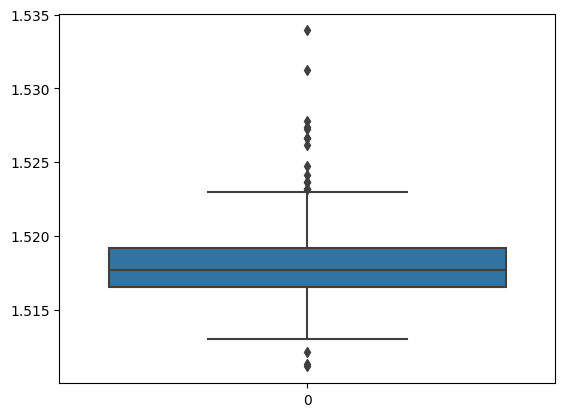

**********Na**********


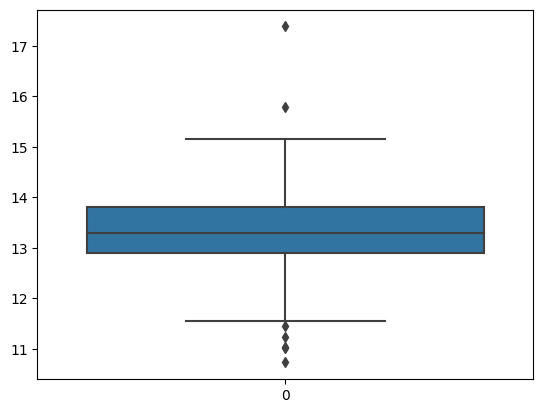

**********Mg**********


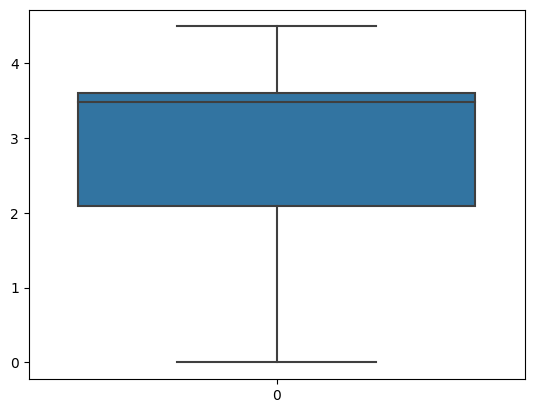

**********Al**********


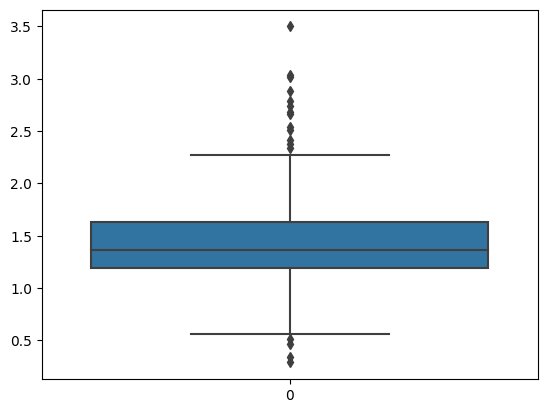

**********Si**********


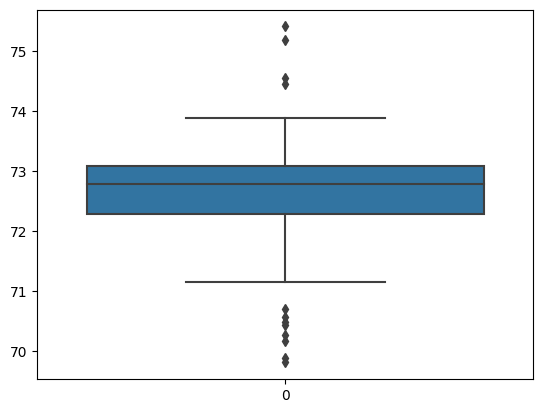

**********K**********


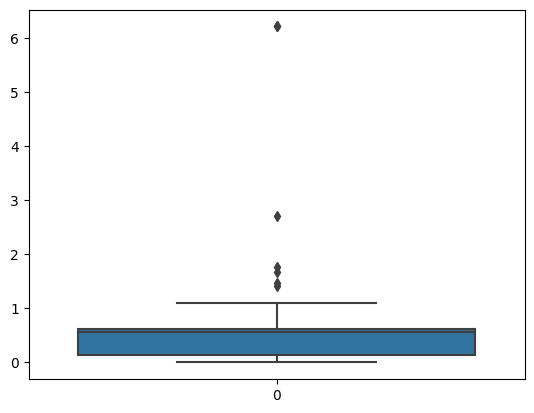

**********Ca**********


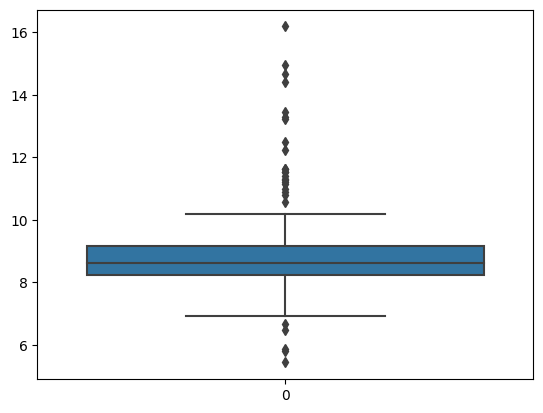

**********Ba**********


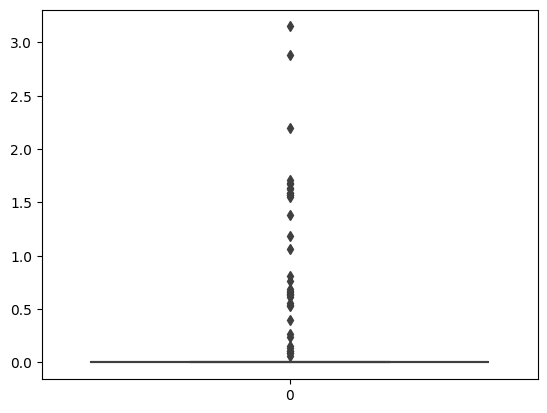

**********Fe**********


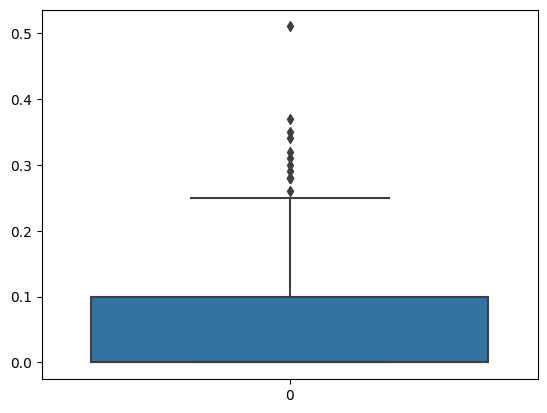

**********Type**********


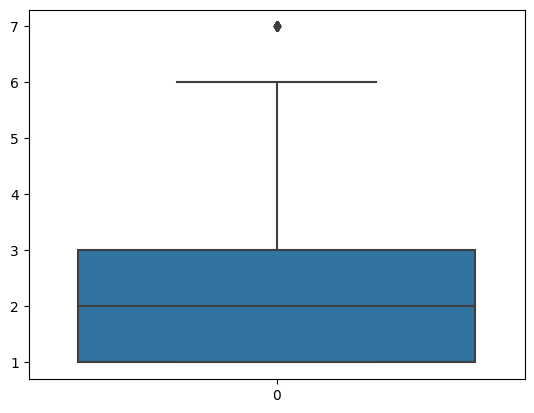

In [118]:
for features in glass.columns:
  print("**********{}**********".format(features))
  sns.boxplot(glass[features])
  plt.show()

In [119]:
glass.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.198802,-0.127526,-0.400973,-0.539000,-0.287645,0.811183,0.001679,0.147083,-0.160140
Na,-0.198802,1.000000,-0.278420,0.167735,-0.064885,-0.264158,-0.278194,0.329080,-0.239374,0.508837
Mg,-0.127526,-0.278420,1.000000,-0.479575,-0.162437,0.007617,-0.446197,-0.491818,0.085426,-0.744195
Al,-0.400973,0.167735,-0.479575,1.000000,-0.016195,0.323683,-0.258068,0.480642,-0.080583,0.597432
Si,-0.539000,-0.064885,-0.162437,-0.016195,1.000000,-0.197281,-0.207145,-0.104389,-0.097717,0.147725
K,-0.287645,-0.264158,0.007617,0.323683,-0.197281,1.000000,-0.317032,-0.043653,-0.009372,-0.012455
Ca,0.811183,-0.278194,-0.446197,-0.258068,-0.207145,-0.317032,1.000000,-0.112208,0.126314,0.002677
Ba,0.001679,0.329080,-0.491818,0.480642,-0.104389,-0.043653,-0.112208,1.000000,-0.059729,0.574896
Fe,0.147083,-0.239374,0.085426,-0.080583,-0.097717,-0.009372,0.126314,-0.059729,1.000000,-0.191090
Type,-0.160140,0.508837,-0.744195,0.597432,0.147725,-0.012455,0.002677,0.574896,-0.191090,1.000000


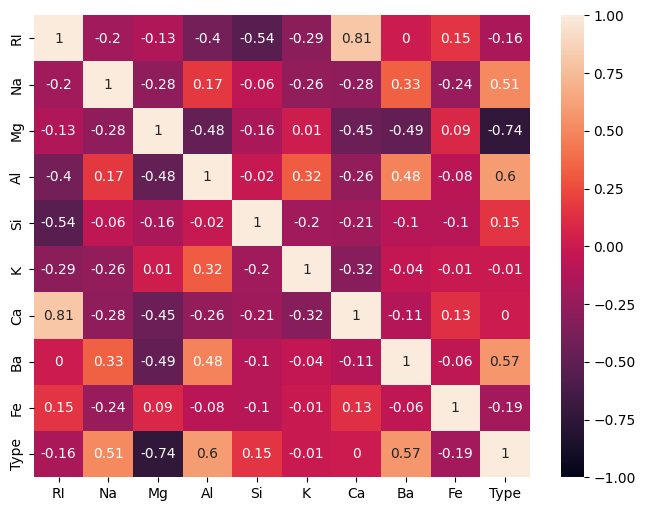

In [120]:
plt.figure(figsize=(8,6))
sns.heatmap(np.round(glass.corr(),2),vmin=-1,vmax=+1,annot=True)
plt.show()

<Axes: xlabel='RI', ylabel='Na'>

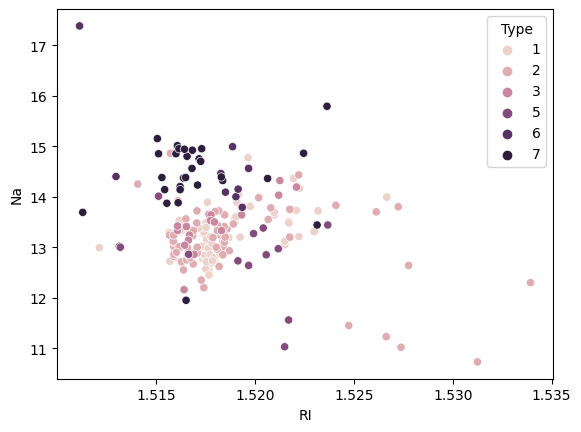

In [121]:
sns.scatterplot(x=glass['RI'],y=glass['Na'],hue=glass['Type'])


<Axes: xlabel='Ca', ylabel='K'>

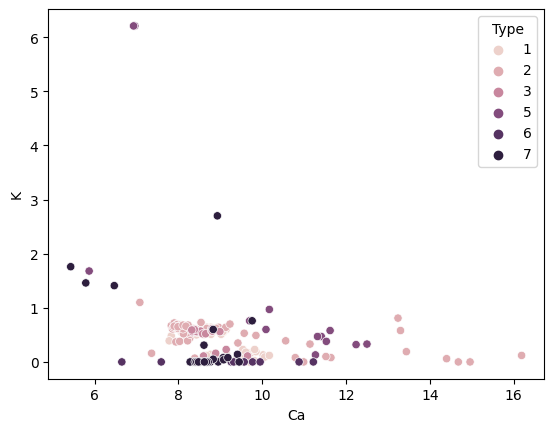

In [122]:
sns.scatterplot(x=glass['Ca'],y=glass['K'],hue=glass['Type'])

<Axes: xlabel='Mg', ylabel='Ba'>

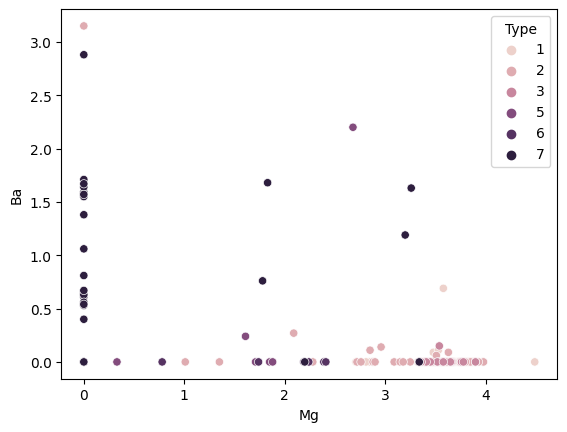

In [123]:
sns.scatterplot(x=glass['Mg'],y=glass['Ba'],hue=glass['Type'])

model building

In [124]:
from sklearn.preprocessing import StandardScaler

In [125]:
x=glass.iloc[:,0:9]
x.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


In [126]:
stscale=StandardScaler()
x=stscale.fit_transform(x)
x

array([[ 0.87984017,  0.28955813,  1.25723832, ..., -0.14346582,
        -0.35380764, -0.58830108],
       [-0.24381562,  0.59640332,  0.63931074, ..., -0.79020061,
        -0.35380764, -0.58830108],
       [-0.71641202,  0.15454625,  0.6045957 , ..., -0.82534924,
        -0.35380764, -0.58830108],
       ...,
       [ 0.76086485,  1.17327228, -1.86017161, ..., -0.36138732,
         2.94550057, -0.58830108],
       [-0.60735132,  1.19781989, -1.86017161, ..., -0.33326842,
         2.80467644, -0.58830108],
       [-0.40905912,  1.01371278, -1.86017161, ..., -0.23485225,
         3.00585377, -0.58830108]])

In [127]:
x=pd.DataFrame(x,columns=glass.columns[:-1])
x.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.879840,0.289558,1.257238,-0.706370,-1.133248,-0.673480,-0.143466,-0.353808,-0.588301
1,-0.243816,0.596403,0.639311,-0.180863,0.097037,-0.028962,-0.790201,-0.353808,-0.588301
2,-0.716412,0.154546,0.604596,0.182950,0.433746,-0.167073,-0.825349,-0.353808,-0.588301
3,-0.227291,-0.238216,0.701798,-0.322346,-0.058368,0.109149,-0.516041,-0.353808,-0.588301
4,-0.306608,-0.164573,0.653197,-0.423405,0.550299,0.078457,-0.621487,-0.353808,-0.588301


In [128]:
y=glass.iloc[:,9]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Type, dtype: int64

In [129]:
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,test_size=0.2,random_state=42)

In [130]:
x_train.shape,x_test.shape

((170, 9), (43, 9))

In [131]:
y_train.shape,y_test.shape

((170,), (43,))

In [132]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [133]:
print("train model score :{}".format(knn.score(x_train,y_train)))
print("test model score :{}".format(knn.score(x_test,y_test)))

train model score :0.8117647058823529
test model score :0.7674418604651163


In [134]:
y_test_pred=knn.predict(x_test)
pd.Series(y_test_pred).value_counts()

2    21
1    12
7     6
3     2
5     1
6     1
dtype: int64

In [135]:
pd.crosstab(y_test,y_test_pred)

col_0,1,2,3,5,6,7
Type,,,,,,
1,10,3,1,0,0,0
2,0,15,0,0,0,0
3,2,0,1,0,0,0
5,0,2,0,1,0,0
6,0,0,0,0,1,1
7,0,1,0,0,0,5


In [136]:
from sklearn.metrics import accuracy_score,classification_report
accuracy_score(y_test,y_test_pred)

0.7674418604651163

In [137]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           1       0.83      0.71      0.77        14
           2       0.71      1.00      0.83        15
           3       0.50      0.33      0.40         3
           5       1.00      0.33      0.50         3
           6       1.00      0.50      0.67         2
           7       0.83      0.83      0.83         6

    accuracy                           0.77        43
   macro avg       0.81      0.62      0.67        43
weighted avg       0.79      0.77      0.75        43



In [138]:
train_score=[]
test_score=[]
for i in range(1,10):
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train,y_train)
  train_score.append(knn.score(x_train,y_train))
  test_score.append(knn.score(x_test,y_test))

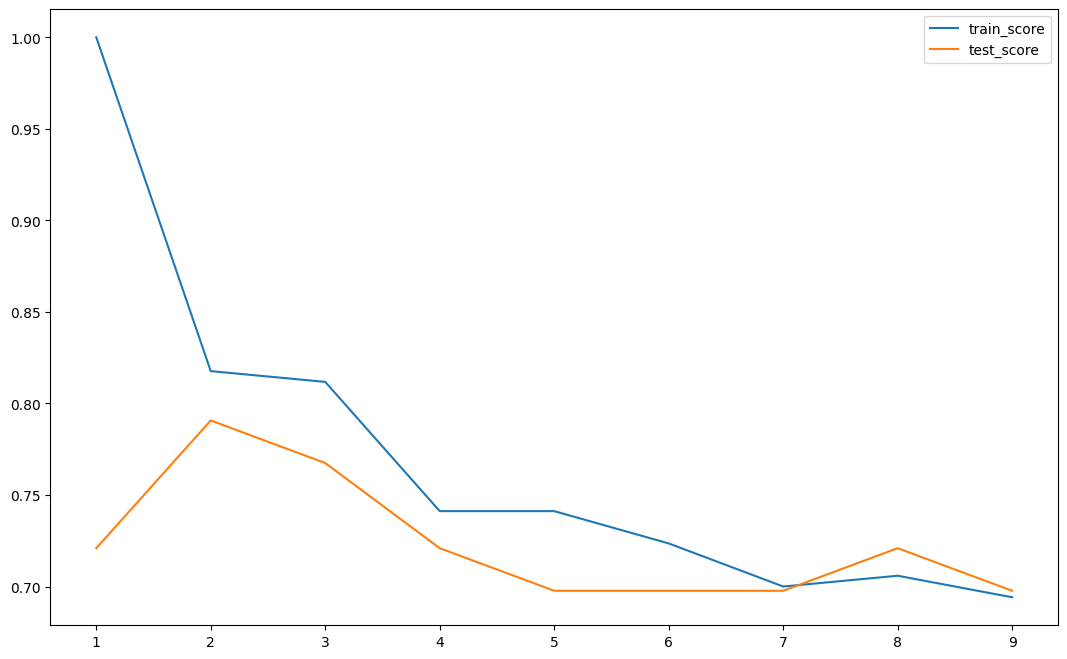

In [139]:
plt.figure(figsize=[13,8])
plt.plot(range(1,10),train_score,label="train_score")
plt.plot(range(1,10),test_score,label="test_score")
plt.legend()

In [140]:
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train,y_train)
print("train model score :{}".format(knn.score(x_train,y_train)))
print("test model score :{}".format(knn.score(x_test,y_test)))

train model score :0.7
test model score :0.6976744186046512


GRID SEARCH

In [141]:
n_neighbors=range(1,20)
weights=['uniform', 'distance']
algorithm=['auto', 'ball_tree', 'kd_tree', 'brute']
leaf_size=[30,35,40,45]
metric=['euclidean','minkowski']
param_grid = dict(n_neighbors=n_neighbors,weights=weights,algorithm=algorithm,leaf_size=leaf_size,metric=metric)
model=KNeighborsClassifier()
grid=GridSearchCV(estimator=model,param_grid=param_grid)


grid.fit(x, y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [30, 35, 40, 45],
                         'metric': ['euclidean', 'minkowski'],
                         'n_neighbors': range(1, 20),
                         'weights': ['uniform', 'distance']})

In [142]:
print(grid.best_score_)
print(grid.best_params_)

0.6901439645625692
{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}


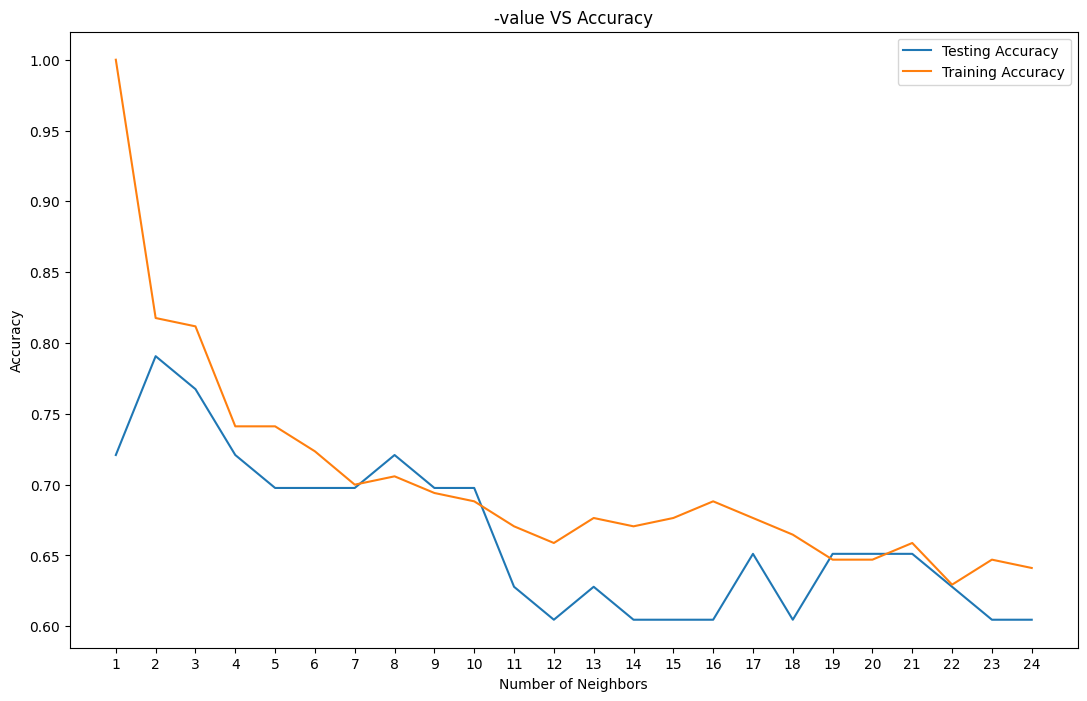

In [143]:
from sklearn.metrics.pairwise import distance
k_values = np.arange(1,25)
train_accuracy = []
test_accuracy = []

for i, k in enumerate(k_values):
    knn = KNeighborsClassifier(n_neighbors=k,leaf_size=30,algorithm='auto',weights= 'uniform')
    knn.fit(x_train,y_train)
    train_accuracy.append(knn.score(x_train, y_train))
    test_accuracy.append(knn.score(x_test, y_test))
# Plot
plt.figure(figsize=[13,8])
plt.plot(k_values, test_accuracy, label = 'Testing Accuracy')
plt.plot(k_values, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('-value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.savefig('graph.png')
plt.show()


In [144]:
# lets check at neighbour=7
knn=KNeighborsClassifier(n_neighbors=7,leaf_size=30,algorithm='auto',weights= 'uniform')
knn.fit(x_train,y_train)
print(knn.score(x_train,y_train))
print(knn.score(x_test,y_test))

0.7
0.6976744186046512


In [145]:
# lets check at neighbour=2
knn=KNeighborsClassifier(n_neighbors=2,leaf_size=30,algorithm='auto',weights= 'uniform')
knn.fit(x_train,y_train)
print(knn.score(x_train,y_train))
print(knn.score(x_test,y_test))

0.8176470588235294
0.7906976744186046


with the parameter "n_neighbors=2,leaf_size=30,algorithm='auto',weights= 'uniform'" model able to classify 79% accurately

In [146]:
y_test_pred=knn.predict(x_test)
pd.Series(y_test_pred).value_counts()

1    17
2    16
7     5
5     3
3     1
6     1
dtype: int64

In [147]:
pd.crosstab(y_test,y_test_pred)


col_0,1,2,3,5,6,7
Type,,,,,,
1,13,1,0,0,0,0
2,2,12,0,1,0,0
3,2,0,1,0,0,0
5,0,1,0,2,0,0
6,0,1,0,0,1,0
7,0,1,0,0,0,5


In [148]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           1       0.76      0.93      0.84        14
           2       0.75      0.80      0.77        15
           3       1.00      0.33      0.50         3
           5       0.67      0.67      0.67         3
           6       1.00      0.50      0.67         2
           7       1.00      0.83      0.91         6

    accuracy                           0.79        43
   macro avg       0.86      0.68      0.73        43
weighted avg       0.81      0.79      0.78        43

